# Import Libraries 

In [86]:
import datetime

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Read in dataset and drop unecessary tables

In [95]:
#read in
demographics = pd.read_csv("./data/DEMOGRAPHICS.csv" , usecols=['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name', 'CHSI_State_Name'])
summary = pd.read_csv("./data/SUMMARYMEASURESOFHEALTH.csv", usecols=[ 'Health_Status', 'Unhealthy_Days'])
measure = pd.read_csv("./data/MEASURESOFBIRTHANDDEATH.csv", usecols=['Premature','Under_18', 'Over_40', 'Infant_Mortality', 'IM_Postneonatal', 'IM_Neonatal'])
vunerable  = pd.read_csv("./data/VUNERABLEPOPSANDENVHEALTH.csv", usecols=['Toxic_Chem', 'Recent_Drug_Use'])
risk = pd.read_csv("./data/RISKFACTORSANDACCESSTOCARE.csv", usecols=['Obesity','High_Blood_Pres','Smoker','Diabetes'])

In [96]:
#merge
full = pd.concat([demographics, summary, measure, vunerable,risk], axis=1, join="inner")
selected = full.copy()
selected.drop('CHSI_County_Name', axis=1, inplace=True)
selected.drop('CHSI_State_Name', axis=1, inplace=True)
selected.drop('State_FIPS_Code', axis=1, inplace=True)
selected.drop('County_FIPS_Code', axis=1, inplace=True)
selected.drop('Infant_Mortality', axis=1, inplace=True)

In [106]:
selected.info()
selected.describe()

print('\nMissing Values')
print((selected == -1111.1).sum() + (selected == -2222.2).sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 13 columns):
Health_Status      3141 non-null float64
Unhealthy_Days     3141 non-null float64
Premature          3141 non-null float64
Under_18           3141 non-null float64
Over_40            3141 non-null float64
IM_Neonatal        3141 non-null float64
IM_Postneonatal    3141 non-null float64
Recent_Drug_Use    3141 non-null int64
Toxic_Chem         3141 non-null int64
Obesity            3141 non-null float64
High_Blood_Pres    3141 non-null float64
Smoker             3141 non-null float64
Diabetes           3141 non-null float64
dtypes: float64(11), int64(2)
memory usage: 319.1 KB

Missing Values
Health_Status       664
Unhealthy_Days      545
Premature            17
Under_18             79
Over_40             130
IM_Neonatal         287
IM_Postneonatal     292
Recent_Drug_Use       0
Toxic_Chem            0
Obesity             917
High_Blood_Pres    1619
Smoker              874
Diabete

# Impute the data and fill empty data with mean values

In [107]:
selected = selected.replace(-1111.1, np.NaN)
selected = selected.replace(-2222.2, np.NaN)
selected = selected.replace(-9999, np.NaN)

# fill missing values with mean column values
selected.fillna(selected.mean(), inplace=True)
# count the number of NaN values in each column


# Viewing the data 

,Health_Status,Unhealthy_Days,Premature,Under_18,Over_40,IM_Neonatal,IM_Postneonatal,Recent_Drug_Use,Toxic_Chem,Obesity,High_Blood_Pres,Smoker,Diabetes
count,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3.141000e+03,3141.000000,3141.000000,3141.000000,3141.000000
mean,17.316754,6.106394,11.877401,4.750131,1.742976,4.759951,2.609828,5323.731614,1.411760e+06,24.145189,26.480946,23.112880,7.810188
std,5.406163,1.218892,2.392148,2.262823,0.894922,2.072631,1.395145,18738.553988,1.022878e+07,4.126357,3.783796,4.870894,2.572103
min,2.200000,2.200000,5.100000,0.300000,0.200000,0.000000,0.000000,2.000000,-2.222000e+03,4.200000,7.200000,3.600000,0.500000
25%,13.900000,5.400000,10.200000,3.100000,1.200000,3.400000,1.700000,548.000000,0.000000e+00,22.500000,26.400000,20.900000,6.200000
50%,17.316754,6.106394,11.700000,4.400000,1.600000,4.700000,2.600000,1319.000000,4.783100e+04,24.145189,26.480946,23.112880,7.810188
75%,19.400000,6.600000,13.200000,6.000000,2.100000,5.700000,3.200000,3573.000000,5.662850e+05,25.800000,26.480946,25.100000,9.100000
max,47.700000,12.600000,23.500000,14.500000,9.100000,18.800000,14.200000,665392.000000,4.987494e+08,42.600000,47.100000,46.200000,20.800000


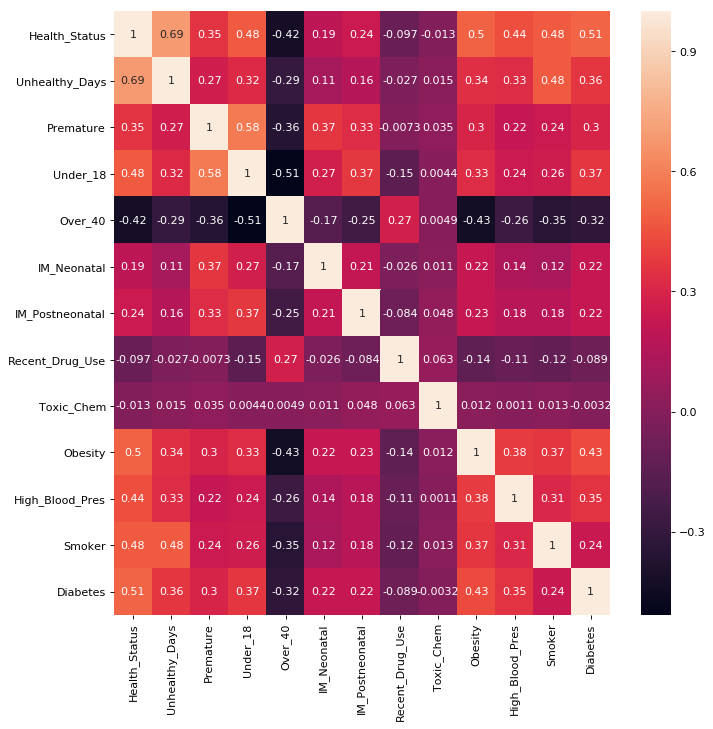

In [108]:
corr = selected.corr()
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='b')
sns.heatmap(corr, annot=True)

selected.head()
selected.describe()

# Split data set to testing and training 

In [109]:
target = pd.DataFrame(full, columns=["Infant_Mortality"])
X_train, X_test, y_train, y_test = train_test_split(selected, target, test_size=0.2)
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2512, 13)
(2512, 1)
(629, 13)
(629, 1)


In [110]:
#m = KNeighborsRegressor(n_neighbors=3)
#m = linear_model.LinearRegression()
#m = linear_model.LassoLars(alpha=.1)
m = DecisionTreeRegressor()
model = m.fit(X_train, y_train)
predictions = m.predict(X_test)
print(predictions.shape)

(629,)


(0, 25)

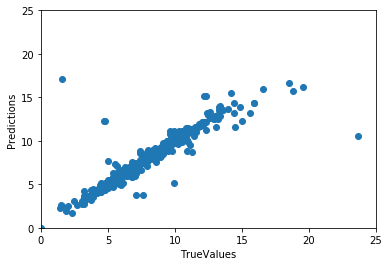

In [111]:
plt.scatter(y_test.values, predictions)
plt.xlabel('TrueValues')
plt.ylabel('Predictions')
plt.xlim(0, 25)
plt.ylim(0, 25)

In [112]:
model.score(X_test, y_test)
fImport = dict(zip(selected.columns, m.feature_importances_))
for i in zip( fImport.keys(), fImport.values()):
    print(i)

('Health_Status', 0.005778506559619893)
('Unhealthy_Days', 6.375649932550038e-07)
('Premature', 0.011961531634076384)
('Under_18', 0.0055205449628892315)
('Over_40', 0.010689328016162042)
('IM_Neonatal', 0.10110209080892801)
('IM_Postneonatal', 0.06382243546504682)
('Recent_Drug_Use', 0.763606245949874)
('Toxic_Chem', 0.004149786901882905)
('Obesity', 0.006179071188743338)
('High_Blood_Pres', 0.012941480688129732)
('Smoker', 0.010022956908216602)
('Diabetes', 0.004225383351437767)


In [113]:
print(X_test.shape)

(629, 13)


In [114]:
from sklearn import tree

tree.export_graphviz(m, out_file='tree.dot')  

# Omit Neonatal Status

#### Outside factors besides Neonatal and postneonatal which is by default meaning that a baby has been born with with birth defects

In [115]:
#Omit Neonatal Status
#Outside factors besides Neonatal and postneonatal which is by default meaning that a baby has been born with 
#with birth defects

toxic = selected
toxic.drop(['IM_Neonatal','IM_Postneonatal'],axis=1, inplace=True)
toxic.head()

,Health_Status,Unhealthy_Days,Premature,Under_18,Over_40,Recent_Drug_Use,Toxic_Chem,Obesity,High_Blood_Pres,Smoker,Diabetes
0,21.8,7.500000,14.3,5.1,1.4,2394,2883197,24.500000,29.100000,26.60000,14.2
1,15.4,6.700000,15.3,4.3,1.9,7753,35664,23.600000,30.500000,24.60000,7.2
2,21.4,6.106394,16.7,7.7,1.1,1403,49874,25.600000,26.480946,17.70000,6.6
3,19.4,6.106394,13.7,6.5,0.9,1034,7302,24.145189,26.480946,23.11288,13.1
4,25.8,7.900000,12.8,5.0,1.3,2675,889020,24.200000,26.480946,23.60000,8.4


('Health_Status', 0.006810495030783586)
('Unhealthy_Days', 0.028719350959868373)
('Premature', 0.03772403720158194)
('Under_18', 0.03455869593383277)
('Over_40', 0.0389459698917722)
('Recent_Drug_Use', 0.7755992780126418)
('Toxic_Chem', 0.006345409716151859)
('Obesity', 0.02959961629795907)
('High_Blood_Pres', 0.0048171427850129235)
('Smoker', 0.022656790772541947)
('Diabetes', 0.014223213397853365)


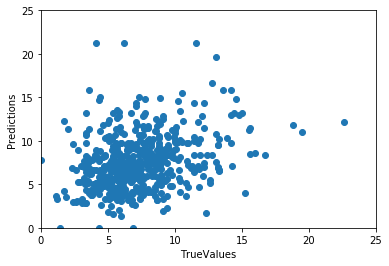

In [116]:
target = pd.DataFrame(full, columns=["Infant_Mortality"])
X_train, X_test, y_train, y_test = train_test_split(selected, target, test_size=0.2)


m = DecisionTreeRegressor()
model = m.fit(X_train, y_train)
predictions = m.predict(X_test)

plt.scatter(y_test.values, predictions)
plt.xlabel('TrueValues')
plt.ylabel('Predictions')
plt.xlim(0, 25)
plt.ylim(0, 25)

model.score(X_test, y_test)
fImport = dict(zip(selected.columns, m.feature_importances_))
for i in zip( fImport.keys(), fImport.values()):
    print(i)